# Несколько примеров использования Numpy (часть 1)

1. Письменный экзамен оказался слишком сложным, и преподаватель решил добавить каждому студенту не менее некоторого количества очков, чтобы в итоге было поменьше плохих оценок. Поможем ему пересчитать первичные баллы в итоговые.

Импортируем библиотеку Numpy:

In [4]:
import numpy as np

Зададим среднее значение итоговых баллов:

In [5]:
CURVE_CENTER = 80

Создадим массив оценок:

In [6]:
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])

Напишем функцию, которая осуществляет пересчёт:

In [7]:
def curve(grades):
    average = grades.mean() # определяем средний первичный балл
    change = CURVE_CENTER - average # определяем количество добавляемое количество очков
    new_grades = grades + change # добавляем это количество очков
    return np.clip(new_grades, grades, 100)

Рассмотрим последнюю строку. Если новая оценка оказалась меньше старой, заменяем её на старую, а если больше 100 - то заменяем на 100. Вызовем функцию:

In [8]:
print(curve(grades))

[ 91.25  54.25  83.25 100.    70.25 100.    93.25  31.25]


## Упражнение 1

В файле `melting.txt` приведены значения флуоресценции различных образцов в диапазоне температур от 28 до 95 градусов. Сами эти абсолютные значения не слишком интересуют исследователей: важнее форма кривых. Чтобы было удобнее сравнивать кривые между собой, отнормируйте их (минимальное значение - 0, максимальное - 1, промежуточное значение делится на разницу между максимальным и минимальным значением). Постройте графики получившихся кривых.

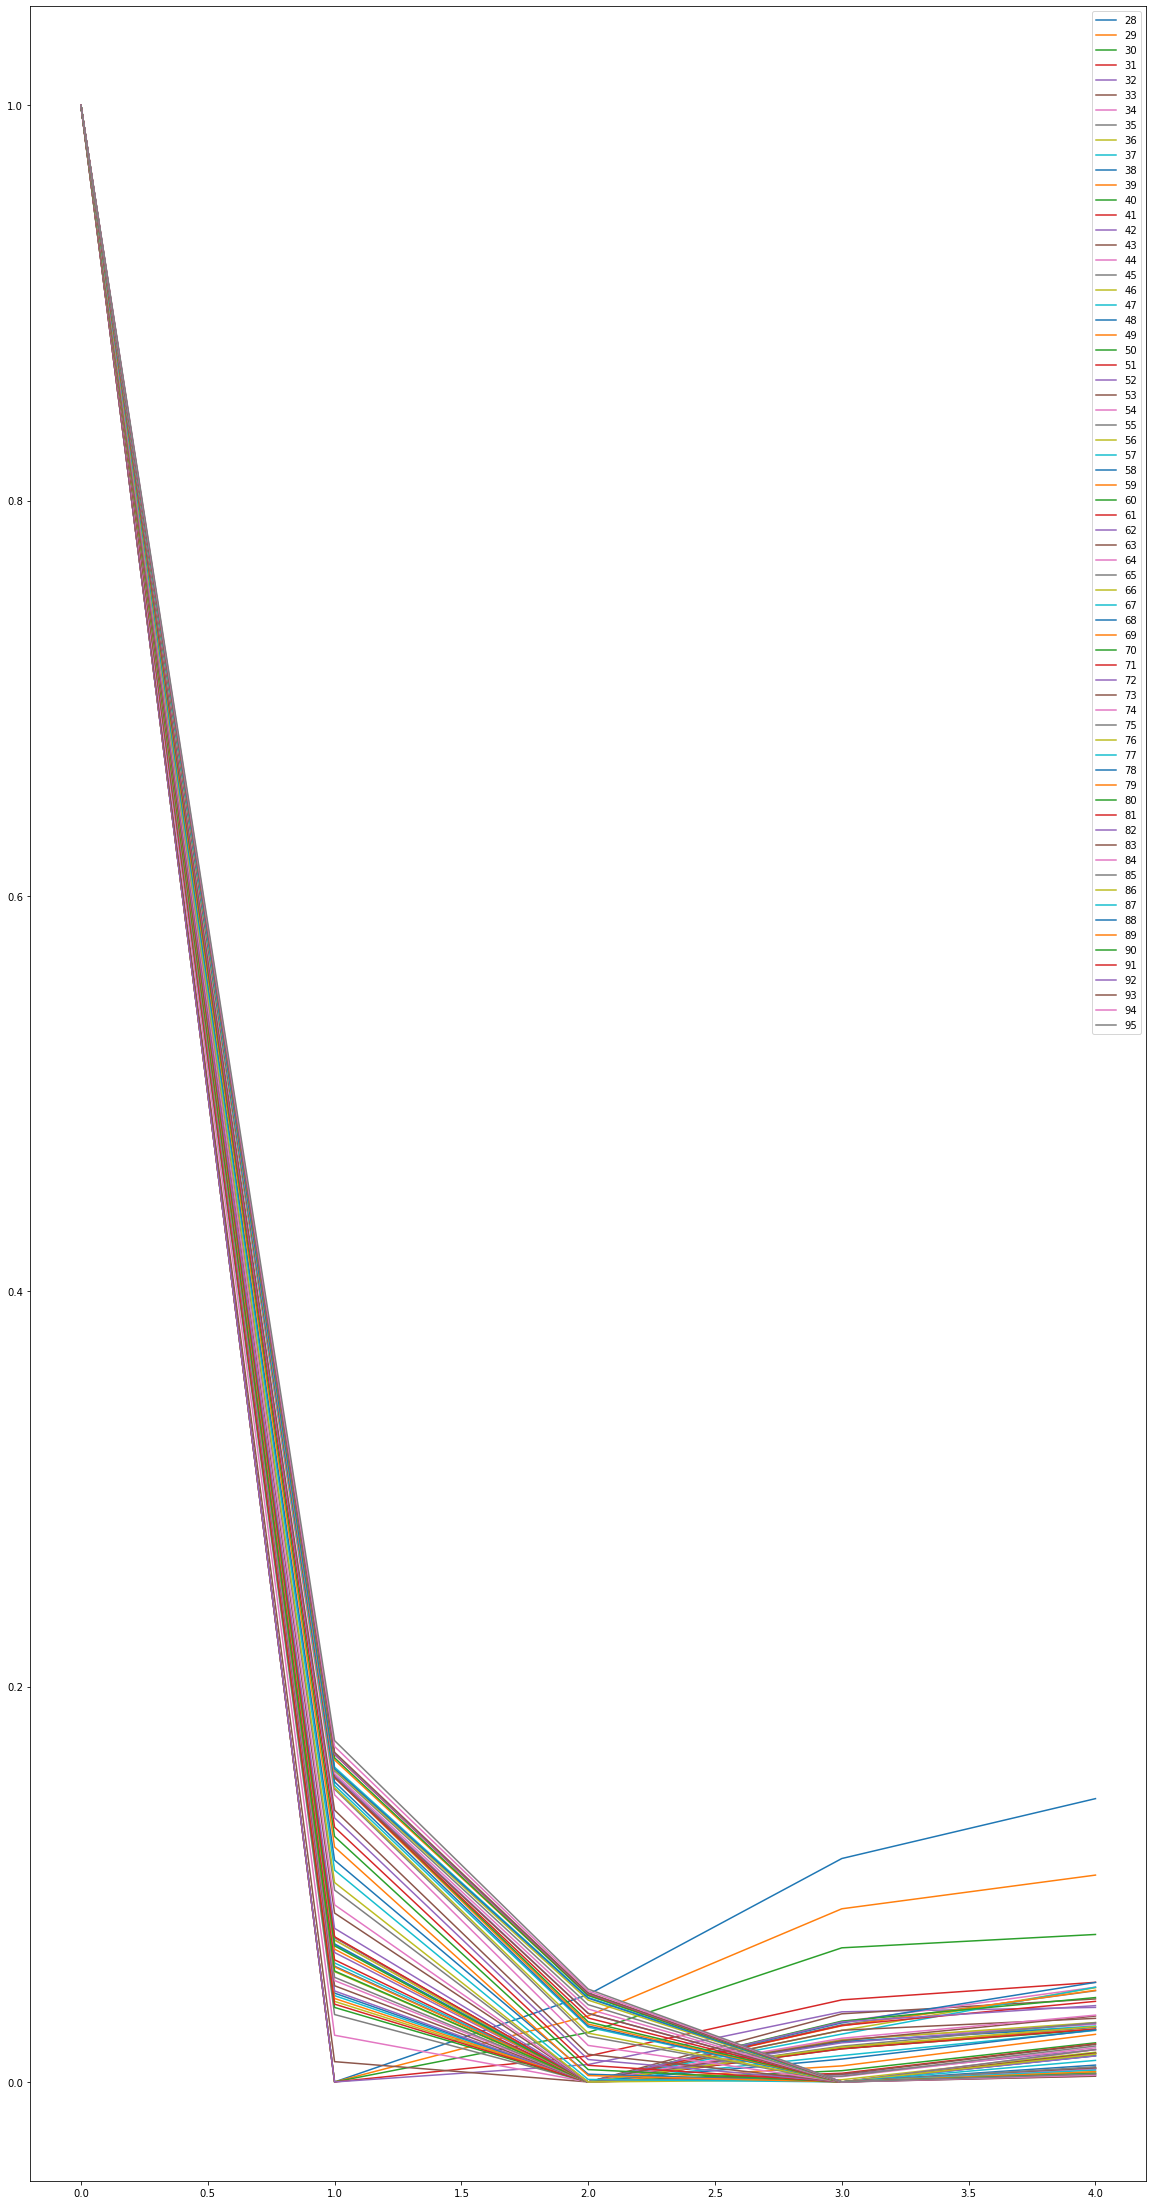

In [21]:
import numpy as np
import matplotlib.pyplot as plt

with open('melting.txt', 'r') as f:
    t, *titles = f.readline().split()
    
    matrix = np.array([np.array(list(map(float, line.split()[1:]))) for line in f])
    
for row in matrix:
    row -= min(row)
    row /= max(row)

fig = plt.figure(figsize=(20, 40))

x_line = [0] * len(matrix)

xs = np.array([0, 1, 2, 3, 4])

for i in range(len(matrix)):
    x_line[i], = plt.plot(xs, matrix[i], label=str(28 + i))
    
    
plt.legend(handles = x_line)

plt.show()    

2. Изменение формы массива, многомерные массивы

Массив не обязан иметь форму 1×n, то есть быть просто последовательностью чисел. Можно использовать многомерные массивы. Создадим массив от 1 до 24:

In [9]:
twentyfour = np.arange(1, 25, 1)
twentyfour

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Создадим на его основе трёхмерный массив:

In [11]:
three_d = twentyfour.reshape(2, 3, 4)
three_d

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

Вычислим среднее значение трёхмерного массива:

In [13]:
three_d.mean()

12.5

Вычислим средние от соответствующих значений первого и второго 2D-массивов, входящих в состав 3D-массива:

In [14]:
three_d.mean(axis=0)

array([[ 7.,  8.,  9., 10.],
       [11., 12., 13., 14.],
       [15., 16., 17., 18.]])

Вычислим средние от каждого столбца 2D-массивов, входящих в состав 3D-массива:

In [15]:
three_d.mean(axis=1)

array([[ 5.,  6.,  7.,  8.],
       [17., 18., 19., 20.]])

Вычислим средние от каждой строки 2D-массивов, входящих в состав 3D-массива:

In [16]:
three_d.mean(axis=2)

array([[ 2.5,  6.5, 10.5],
       [14.5, 18.5, 22.5]])

## Упражнение 2

Прочитайте файлы `ex2_1.txt` и `ex2_2.txt` в двумерный массив, вычислите среднее по каждому столбцу. Читая файлы, исходите из предположения, что количество столбцов в файле заранее неизвестно. Числа в строке разделены табуляцией.

In [28]:
import numpy as np

def read_matrix(filename):
    with open(filename, 'r') as f:
        matrix = np.array([np.array(list(map(float, line.split()))) for line in f])
        return matrix
    
matrix_1 = read_matrix('ex2_1.txt')

print(matrix_1)

print(matrix_1.mean(axis=0))

print()

matrix_2 = read_matrix('ex2_2.txt')

print(matrix_2)

print(matrix_2.mean(axis=0))

[[91. 22. 16. 26. 83.]
 [27. 25. 27. 64. 63.]
 [59. 88. 59. 68. 24.]
 [72. 90. 79. 43. 22.]
 [38. 90. 68. 30. 46.]
 [29. 52. 90. 84. 17.]
 [14. 35. 42. 46. 88.]
 [20. 85. 86. 46. 99.]
 [33. 94. 49. 14. 58.]
 [24. 26. 20. 11. 70.]
 [75. 62. 19. 65. 50.]
 [66. 84. 62. 18. 49.]
 [56. 96. 69. 27. 45.]
 [89. 78. 54. 80. 31.]
 [60. 26. 62. 50. 62.]
 [54. 40. 82. 53. 77.]
 [40. 53. 51. 46. 54.]
 [43. 22. 48. 14. 19.]
 [56. 79. 16. 96. 92.]
 [61. 26. 12. 26. 99.]]
[50.35 58.65 50.55 45.35 57.4 ]

[[77. 29. 64. 86. 50. 96.]
 [35. 22. 10. 56. 50. 88.]
 [57. 94. 54. 62. 95. 33.]
 [28. 26. 56. 54. 28. 27.]
 [16. 70. 53. 65. 11. 52.]
 [69. 48. 67. 34. 83. 58.]
 [43. 64. 47. 86. 69. 19.]
 [25. 99. 92. 68. 65. 80.]
 [93. 74. 53. 86. 10. 41.]
 [60. 22. 19. 31. 41. 33.]
 [47. 34. 15. 53. 19. 45.]
 [10. 89. 47. 10. 21. 95.]
 [32. 57. 31. 32. 94. 85.]
 [36. 86. 82. 33. 61. 48.]
 [10. 48. 92. 63. 72. 55.]
 [42. 31. 88. 74. 83. 95.]
 [16. 20. 15. 17. 31. 10.]
 [17. 86. 43. 54. 16. 93.]]
[39.61111111 55.5  

3. Взятие элементов по индексу

Можно создавать массивы-"срезы" на основании имеющихся массивов:

In [18]:
print(three_d[0, ::2,]) # взяли первый 2D-массив из 3D-массива, вытащили нечётные строки полностью

[[ 1  2  3  4]
 [ 9 10 11 12]]


In [21]:
print(three_d[:, 1:, 1:]) # в каждом из 2D-массивов отбросили первую строку и первый столбец

[[[ 6  7  8]
  [10 11 12]]

 [[18 19 20]
  [22 23 24]]]


## Упражнение 3

Задан двумерный массив:

```
square = np.array([
    [16, 3, 2, 13],
    [5, 10, 11, 8],
    [9, 6, 7, 12],
    [4, 15, 14, 1]
])
```
Вычислите сумму чисел в каждом столбце, в каждой строке, в каждом квадрате 2×2, который можно вырезать из имеющегося (5 шт). Выведите её на экран для каждого случая.

In [46]:
square = np.array([
    [16, 3, 2, 13],
    [5, 10, 11, 8],
    [9, 6, 7, 12],
    [4, 15, 14, 1]
])

print('Columns:', np.sum(square, axis=0))
print('Rows:', np.sum(square, axis=1))

s = np.array([square[i:i+2, j:j+2] for i in range(3) for j in range(3)])

sums = [np.sum(el) for el in s]

print('Squares:', sums)

Columns: [34 34 34 34]
Rows: [34 34 34 34]
Squares: [34, 26, 34, 30, 34, 38, 34, 42, 34]


4. Фильтрация массива

В некоторых случаях требуется выбрать элементы не по индексу, а по какому-то признаку, например, делимость на 3. Для этого можно создать массив-маску. Он имеет ту же форму, что и исходный массив, однако содержит булевские значения (`True`/`False`)

Создадим случайный массив 4×3 и получим маску по условию "делится на 3":

In [24]:
rnd_array = np.random.randint(0, 21, size=(4, 3))
print(rnd_array)

mask = rnd_array % 3 == 0
print(mask)

[[ 1  4 19]
 [14 11  4]
 [ 4 15  5]
 [10  7  4]]
[[False False False]
 [False False False]
 [False  True False]
 [False False False]]


In [25]:
rnd_array[mask]

array([15])

## Упражнение 4

Вычислите среднее и стандартное отклонение чисел из файла `ex4.txt`, затем найдите выбросы (*x* < *Q*1 - 1.5 × *IQR* или *x* > *Q*3 + 1.5 × *IQR*  и вычислите среднее и стандартное отклонение без них.

In [57]:
import numpy as np

with open('ex4.txt', 'r') as f:
    array = np.array([int(line) for line in f])
    
mean = array.mean()
std = array.std()

print(mean, std)

q25 = np.quantile(array, 0.25)
q75 = np.quantile(array, 0.75)

mask = ((q25 - 1.5 * (q75 - q25)) <= array) & (array <= (q75 + 1.5 * (q75 - q25)))

array_without_outliers = array[mask]

mean_w = array_without_outliers.mean()
std_w = array_without_outliers.std()

print(mean_w, std_w)

4382.08 1816.365239041972
5071.064814814815 572.7614601590126
